In [2]:
library(IRkernel)

In [3]:
library(jsonlite)

In [1]:
.libPaths()

[1] "/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library"

In [ ]:
library(DESeq2)

In [ ]:
library(IsoformSwitchAnalyzeR)

In [7]:
library(jsonlite)
library(IRkernel)
library(repr)

In [7]:
isoformExpr <- importIsoformExpression(parentDir="/disk1/wenqing/tmp_data/ASD/salmon_quant_gencode", pattern="quant.sf")
samples <- c("17","18","57","20","32","56")
condictions <- c(rep_len("ASD", 3), rep_len("Control", 3))
#samples <- c("17","18","57")
#condictions <- c(rep_len("ASD", 2), rep_len("Control", 1))
designM <- data.frame(sampleID=samples, condition=condictions)
designM
switchList <- importRdata(isoformCountMatrix=isoformExpr$counts, isoformRepExpression=isoformExpr$abundance, designMatrix=designM, isoformExonAnnoation="/disk1/wenqing/tmp_data/hg19/gencode.v44lift37.annotation.gtf", isoformNtFasta="/disk1/wenqing/tmp_data/hg19/gencode.v44lift37.transcripts.fa")
switchListF <- preFilter(switchList)


Step 1 of 3: Identifying which algorithm was used...

    The quantification algorithm used was: Salmon

    Found 6 quantification file(s) of interest

Step 2 of 3: Reading data...

reading in files with read_tsv

1 
2 
3 
4 
5 
6 


Step 3 of 3: Normalizing abundance values (not counts) via edgeR...

Done




sampleID,condition
<chr>,<chr>
17,ASD
18,ASD
57,ASD
20,Control
32,Control
56,Control


Step 1 of 10: Checking data...

Step 2 of 10: Obtaining annotation...

    importing GTF (this may take a while)...

Warning message in importRdata(isoformCountMatrix = isoformExpr$counts, isoformRepExpression = isoformExpr$abundance, :
"The annotation and quantification (count/abundance matrix and isoform annotation) Seem to be slightly different. 
Specifically:
 324 isoforms were only found in the annotation
 
Please make sure this is on purpouse since differences will cause inaccurate quantification and thereby skew all analysis.
 If you have quantified with Salmon this could be normal since it as default only keep one copy of identical sequnces (can be prevented using the --keepDuplicates option)
 We strongly encurage you to go back and figure out why this is the case.

"
    108957 ( 43.17%) isoforms were removed since they were not expressed in any samples.

Step 3 of 10: Fixing StringTie gene annoation problems...

    There were no need to rescue any annotation

    43169 genes

  |======================================================================| 100%


Step 8 of 10: Making comparisons...



  |======================================================================| 100%


Step 9 of 10: Making switchAnalyzeRlist object...

Warning message in createSwitchAnalyzeRlist(isoformFeatures = isoAnnot, exons = isoformExonStructure, :
"The gene_ids or isoform_ids were not unique - we identified multiple instances of the same gene_id/isoform_id on different chromosomes. To solve this we removed 45 gene_id. Please note there might still be duplicated gene_id located on the same chromosome. Some of these could be due to fusion transcripts which IsoformSwitchAnalyzeR cannot handle."
Step 10 of 10: Guestimating differential usage...

    The GUESSTIMATED number of genes with differential isoform usage are:



      comparison estimated_genes_with_dtu
1 ASD vs Control                    0 - 0


Done


The filtering removed 86546 ( 60.62% of ) transcripts. There is now 56211 isoforms left



In [ ]:
#abundance=TxPM(相当于RPKM/FPKM)，但已经根据用于量化的工具模拟的所有偏差进行了调整，包括片段长度分布和序列特异性偏差以及GC-片段偏差（这取决于每个工具及其运行方式，因此您需要查找具体的工具）。TxPM对于比较丰度的表达是最优的，因为大多数偏差都会被考虑在内。
#head(isoformExpr$abundance)
#head(isoformExpr$counts)
#names(isoformExpr)
#head(isoformExpr$importOptions)

In [10]:
dim(switchList$isoformFeatures)
#dim(as.data.frame(switchList$exons))
#head(switchList$exons@ranges)
#write.csv(as.data.frame(switchList$exons),'/disk1/wenqing/tmp_data/ASD/switchList_exon.csv',quote=F)

[1] 142757     30

In [11]:
#PTC: A logic indicating whether the isoform is classified as having a Premature Termination Codon. This is defined as having a stop codon more than PTCDistance (default is 50) nt upstream of the last exon exon junction.
table(switchList$isoformFeatures$PTC)


FALSE  TRUE 
51622 11449 

In [12]:
table(switchList$isoformFeatures$IF_overall==0)


 FALSE   TRUE 
142392    365 

In [13]:
#prefilter过滤掉86519（61.33%）的isoform
length(switchListF$isoformFeatures$isoform_id)

[1] 56211

In [14]:
#isoformSwitchTestDEXSeq:分析差异表达的isoform
#uses DEXSeq to test for differential isoform usage using the replicate count matrix.
#dIFcutoff：过滤在两条件下IF usage没有改变的isoform
switchListD <- isoformSwitchTestDEXSeq(switchAnalyzeRlist=switchListF, alpha=0.05)         

Step 1 of 2: Testing each pairwise comparisons with DEXSeq (this might be a bit slow)...

    Estimated run time is: 25.7 min

Step 2 of 2: Integrating result into switchAnalyzeRlist...

    Isoform switch analysis was performed for 13158 gene comparisons (100%).

Total runtime: 1.89 min

Done



In [15]:
names(switchListD)

[1] "isoformFeatures"       "exons"                 "conditions"           
 [4] "designMatrix"          "sourceId"              "isoformCountMatrix"   
 [7] "isoformRepExpression"  "runInfo"               "orfAnalysis"          
[10] "isoformRepIF"          "ntSequence"            "isoformSwitchAnalysis"

In [17]:
asd_de_ei_expr_genes <- read.csv("/disk1/wenqing/tmp_data/ASD/ASD_CTR_geneEI_Expr.csv")

In [18]:
head(asd_de_ei_expr_genes)

,X,expr_p_adjs,ei_p_adjs,all_labels
,<chr>,<dbl>,<dbl>,<chr>
1,RAB40C,4.477316e-05,-0.07652250,up_down
2,PRKAR2B,2.532669e-05,-0.06360257,up_down
3,AC003991.3,-1.156778e-02,-0.07652250,down_down
4,MBNL2,-1.852806e-10,-0.07652250,down_down
5,BRD4,4.087192e-03,-0.07652250,up_down
6,SUPT20H,-3.750842e-02,-0.07652250,down_down


In [26]:
asd_de_ei_expr_gene_WzIso <- intersect(asd_de_ei_expr_genes$X,switchListF$isoformFeatures$gene_id)
asd_de_ei_expr_gene_WzDEIso <- intersect(asd_de_ei_expr_genes$X,switchListD$isoformFeatures$gene_id)

In [27]:
head(asd_de_ei_expr_gene_WzIso)
asd_de_ei_expr_gene_WzDEIso

[1] "RAB40C"    "PRKAR2B"   "MBNL2"     "BRD4"      "SUPT20H"   "C14orf132"

[1] "LRRC3B"

In [28]:
switchListD$isoformFeatures %>% 
  dplyr::filter(gene_id=="LRRC3B")

iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
isoComp_00076060,geneComp_00026160,ENST00000396641.7_3,LRRC3B,ASD,Control,LRRC3B,protein_coding,protein_coding,3.668202,⋯,0.18971649,-2.34376214,NA,0.17790000,0.30303333,0.052766667,-0.250266667,0.81146972,0.02573849,FALSE
isoComp_00076061,geneComp_00026160,ENST00000414619.1_7,LRRC3B,ASD,Control,LRRC3B,protein_coding,protein_coding,3.668202,⋯,0.15391725,-0.92690301,NA,0.08870000,0.10783333,0.069566667,-0.038266667,0.99134410,0.02573849,FALSE
isoComp_00076062,geneComp_00026160,ENST00000417744.5_1,LRRC3B,ASD,Control,LRRC3B,protein_coding,protein_coding,3.668202,⋯,0.34028679,6.09946675,NA,0.08830000,0.00000000,0.176600000,0.176600000,0.02573849,0.02573849,FALSE
isoComp_00076063,geneComp_00026160,ENST00000432040.1_5,LRRC3B,ASD,Control,LRRC3B,protein_coding,protein_coding,3.668202,⋯,0.02942762,-1.01081860,NA,0.01233333,0.01583333,0.008833333,-0.007000000,1.00000000,0.02573849,FALSE
isoComp_00076064,geneComp_00026160,ENST00000456208.2_1,LRRC3B,ASD,Control,LRRC3B,protein_coding,protein_coding,3.668202,⋯,0.35305235,0.01044423,NA,0.33116667,0.28776667,0.374566667,0.086800000,0.98885559,0.02573849,FALSE
isoComp_00076065,geneComp_00026160,ENST00000469437.1_1,LRRC3B,ASD,Control,LRRC3B,protein_coding,protein_coding_CDS_not_defined,3.668202,⋯,0.12273606,1.81989618,NA,0.02003333,0.00800000,0.032066667,0.024066667,0.99781369,0.02573849,NA
isoComp_00076066,geneComp_00026160,ENST00000648296.1_2,LRRC3B,ASD,Control,LRRC3B,protein_coding,nonsense_mediated_decay,3.668202,⋯,0.08241284,-0.35003531,NA,0.28156667,0.27753333,0.285600000,0.008066667,1.00000000,0.02573849,TRUE


Omitting toplogy visualization as it has not been added. You can add this analysis through analyzeDeepTMHMM(). To avoid this message set "plotTopology=FALSE"



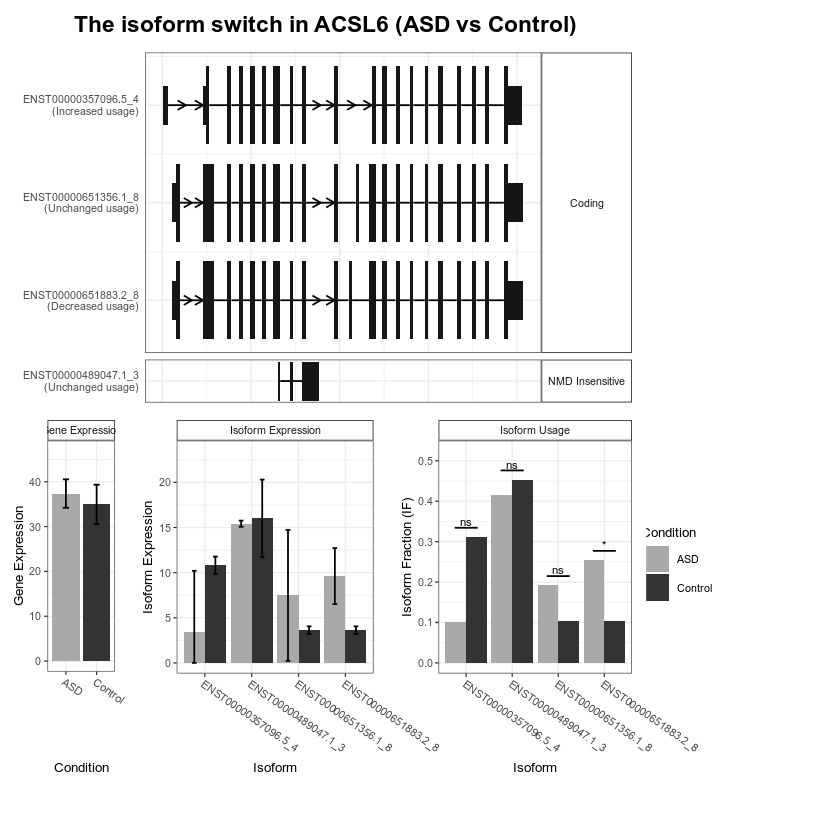

In [ ]:
switchPlot(switchListD, gene = 'ACSL6',
           condition1="ASD",
           condition2="Control")

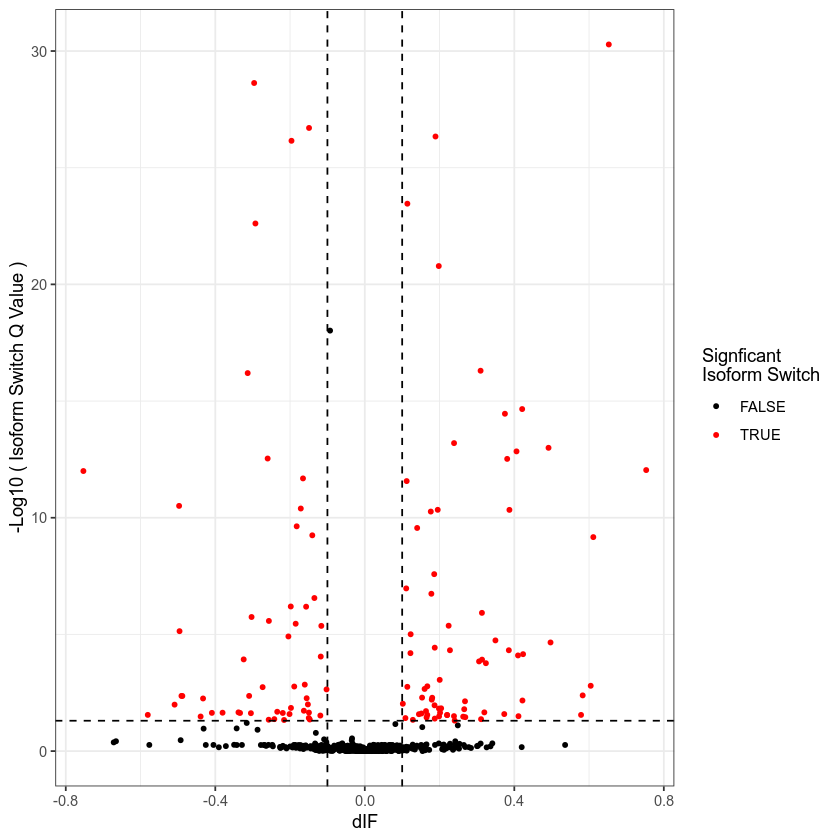

In [ ]:
ggplot(data=switchListD$isoformFeatures, aes(x=dIF, y=-log10(isoform_switch_q_value))) +
  geom_point(
    aes( color=abs(dIF) > 0.1 & isoform_switch_q_value < 0.05 ), # default cutoff
    size=1
  ) +
  geom_hline(yintercept = -log10(0.05), linetype='dashed') + # default cutoff
  geom_vline(xintercept = c(-0.1, 0.1), linetype='dashed') + # default cutoff
  scale_color_manual('Signficant\nIsoform Switch', values = c('black','red')) +
  labs(x='dIF', y='-Log10 ( Isoform Switch Q Value )') +
  theme_bw()


In [ ]:
dim(switchListD$isoformFeatures)
length(unique(switchListD$isoformFeatures$isoform_id))
head(switchListD$exons)

[1] 587  30

[1] 587

GRanges object with 6 ranges and 3 metadata columns:
      seqnames            ranges strand |          isoform_id         gene_id
         <Rle>         <IRanges>  <Rle> |         <character>     <character>
  [1]     chr1 46899499-46899619      + | ENST00000606395.1_2 ENSG00000291138
  [2]     chr1 46900879-46900920      + | ENST00000606395.1_2 ENSG00000291138
  [3]     chr1 46901584-46901708      + | ENST00000606395.1_2 ENSG00000291138
  [4]     chr1 46901796-46902125      + | ENST00000606395.1_2 ENSG00000291138
  [5]     chr1 46901817-46901920      + | ENST00000429784.2_2 ENSG00000291138
  [6]     chr1 46905195-46905249      + | ENST00000429784.2_2 ENSG00000291138
            gene_name
          <character>
  [1] ENSG00000291138
  [2] ENSG00000291138
  [3] ENSG00000291138
  [4] ENSG00000291138
  [5] ENSG00000291138
  [6] ENSG00000291138
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [ ]:
#将差异表达isoform提取成表格
attach(switchListD$isoformFeatures)
de_isoform <- switchListD$isoformFeatures[abs(dIF) > 0.1 & isoform_switch_q_value < 0.05,]

In [ ]:
dim(de_isoform)
#write.csv(de_isoform,"/disk1/wenqing/tmp_data/ASD/deEx_isoform.csv",quote=F)

[1] 125  30

In [ ]:
head(switchListD$isoformFeatures)

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
117218,isoComp_00000023,geneComp_00000007,ENST00000648157.1_1,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.35615602,0.07240242,NA,0.87073333,0.81510000,0.92636667,0.11126667,6.528526e-01,3.487953e-06,NA
117219,isoComp_00000024,geneComp_00000007,ENST00000667950.1_2,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.09214425,4.06859677,NA,0.03426667,0.00000000,0.06853333,0.06853333,5.463666e-01,3.487953e-06,NA
117220,isoComp_00000025,geneComp_00000007,ENST00000670582.1_1,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.00000000,-5.40781060,NA,0.09245000,0.18490000,0.00000000,-0.18490000,3.487953e-06,3.487953e-06,NA
68317,isoComp_00001614,geneComp_00000503,ENST00000357096.5_4,ACSL6,ASD,Control,ACSL6,protein_coding,protein_coding,36.16378,⋯,0.48814506,1.64819944,NA,0.20611667,0.10056667,0.31166667,0.21110000,5.255387e-01,3.824508e-02,FALSE
68320,isoComp_00001617,geneComp_00000503,ENST00000489047.1_3,ACSL6,ASD,Control,ACSL6,protein_coding,retained_intron,36.16378,⋯,2.19335783,0.05369243,NA,0.43408333,0.41466667,0.45350000,0.03883333,8.738374e-01,3.824508e-02,NA
68321,isoComp_00001618,geneComp_00000503,ENST00000492156.1_3,ACSL6,ASD,Control,ACSL6,protein_coding,retained_intron,36.16378,⋯,0.20257117,-1.64233548,NA,0.01248333,0.01876667,0.00620000,-0.01256667,6.217782e-01,3.824508e-02,NA


In [ ]:
switchListO <- analyzeORF(switchListD)

Step 1 of 3 : Extracting transcript sequences...

Step 2 of 3 : Locating potential ORFs...



  |======================================================================| 100%


Step 3 of 3 : Scanning for PTCs...

518 putative ORFs were identified, analyzed and added.

Done



In [ ]:
head(switchListO$isoformFeatures)
names(switchListO)

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,iso_stderr_2,iso_log2_fold_change,iso_q_value,IF_overall,IF1,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
117218,isoComp_00000023,geneComp_00000007,ENST00000648157.1_1,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.35615602,0.07240242,NA,0.87073333,0.81510000,0.92636667,0.11126667,6.528526e-01,3.487953e-06,TRUE
117219,isoComp_00000024,geneComp_00000007,ENST00000667950.1_2,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.09214425,4.06859677,NA,0.03426667,0.00000000,0.06853333,0.06853333,5.463666e-01,3.487953e-06,FALSE
117220,isoComp_00000025,geneComp_00000007,ENST00000670582.1_1,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.00000000,-5.40781060,NA,0.09245000,0.18490000,0.00000000,-0.18490000,3.487953e-06,3.487953e-06,FALSE
68317,isoComp_00001614,geneComp_00000503,ENST00000357096.5_4,ACSL6,ASD,Control,ACSL6,protein_coding,protein_coding,36.16378,⋯,0.48814506,1.64819944,NA,0.20611667,0.10056667,0.31166667,0.21110000,5.255387e-01,3.824508e-02,FALSE
68320,isoComp_00001617,geneComp_00000503,ENST00000489047.1_3,ACSL6,ASD,Control,ACSL6,protein_coding,retained_intron,36.16378,⋯,2.19335783,0.05369243,NA,0.43408333,0.41466667,0.45350000,0.03883333,8.738374e-01,3.824508e-02,FALSE
68321,isoComp_00001618,geneComp_00000503,ENST00000492156.1_3,ACSL6,ASD,Control,ACSL6,protein_coding,retained_intron,36.16378,⋯,0.20257117,-1.64233548,NA,0.01248333,0.01876667,0.00620000,-0.01256667,6.217782e-01,3.824508e-02,NA


[1] "isoformFeatures"       "exons"                 "conditions"           
 [4] "designMatrix"          "sourceId"              "isoformCountMatrix"   
 [7] "isoformRepExpression"  "runInfo"               "orfAnalysis"          
[10] "isoformRepIF"          "ntSequence"            "isoformSwitchAnalysis"

In [ ]:
#提取转录本的核苷酸序列+氨基酸序列
switchListS <- extractSequence(switchListO, pathToOutput="/disk1/wenqing/tmp_data/ASD/IsoformSequence")

Step 1 of 3 : Extracting transcript nucleotide sequences...

Step 2 of 3 : Extracting ORF AA sequences...

Step 3 of 3 : Preparing output...

The 'removeLongAAseq' and 'removeShortAAseq' arguments:
 Removed : 0 isoforms.
 Trimmed : 0 isoforms (to only contain the first 1000 AA)

Done



In [ ]:
extractSwitchSummary(switchListS)

Comparison,nrIsoforms,nrSwitches,nrGenes
<chr>,<int>,<int>,<int>
ASD vs Control,125,138,107


In [ ]:
#为每个isoform添加coding potential分数
switchListC <- analyzeCPAT(switchListS, pathToCPATresultFile="/disk1/wenqing/tmp_data/ASD/prepForIso/cpat_res/output1", codingCutoff=0.364, removeNoncodinORFs=FALSE)


Added coding potential to 587 (100%) transcripts



In [ ]:
names(switchListC)
#str(switchListC$aaSequence)
#587个有isoform usage组件差异的isoform仅有120个有coding potential
table(switchListC$isoformFeatures$codingPotential)

[1] "isoformFeatures"       "exons"                 "conditions"           
 [4] "designMatrix"          "sourceId"              "isoformCountMatrix"   
 [7] "isoformRepExpression"  "runInfo"               "orfAnalysis"          
[10] "isoformRepIF"          "ntSequence"            "isoformSwitchAnalysis"
[13] "aaSequence"


FALSE  TRUE 
  467   120 

In [ ]:
#analyzePFAM：添加Prediction of protein domains的结果
switchListP <- analyzePFAM(switchListC, pathToPFAMresultFile="/disk1/wenqing/tmp_data/ASD/prepForIso/pfam_res/pfam_scan_result.fa")                            


Converting AA coordinats to transcript and genomic coordinats...



  |======================================================================| 100%


Added domain information to 223 (37.99%) transcripts



In [ ]:
names(switchListP)
587-295-223
#587个iso中，295个未落在domain中，223落在结构域中，69个信息未知,其中：223个iso所位于的domain有重叠，详见switchListP$domainAnalysis
table(switchListP$isoformFeatures$domain_identified)
head(switchListP$domainAnalysis)

[1] "isoformFeatures"       "exons"                 "conditions"           
 [4] "designMatrix"          "sourceId"              "isoformCountMatrix"   
 [7] "isoformRepExpression"  "runInfo"               "orfAnalysis"          
[10] "isoformRepIF"          "ntSequence"            "isoformSwitchAnalysis"
[13] "aaSequence"            "domainAnalysis"

[1] 69


 no yes 
295 223 

,isoform_id,hmm_acc,hmm_name,clan,orf_aa_start,orf_aa_end,type,bit_score,E_value,significant,residue,domain_isotype,domain_isotype_simple,transcriptStart,transcriptEnd,pfamStarExon,pfamEndExon,pfamStartGenomic,pfamEndGenomic
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,ENST00000040663.8_3,PF01008.21,IF-2B,CL0063,44,346,Family,263.9,1.7e-78,1,predicted_active_site,Reference,Reference,197,1105,1,6,13875532,13883023
2,ENST00000215531.6_9,PF15807.9,MAP17,No_clan,1,130,Family,179.5,2.6e-53,1,NA,Reference,Reference,63,452,1,4,3480461,3474844
3,ENST00000222250.5_5,PF00339.33,Arrestin_N,CL0135,9,158,Domain,143.5,5.2e-42,1,NA,Reference,Reference,166,615,1,3,18119144,18119912
4,ENST00000222250.5_5,PF02752.26,Arrestin_C,CL0135,180,307,Domain,96.0,2.5e-27,1,NA,Reference,Reference,679,1062,4,6,18120449,18121076
5,ENST00000222390.11_14,PF00024.30,PAN_1,CL0168,40,124,Domain,47.3,1.6e-12,1,NA,Insertion,Non-reference,194,448,2,4,81392159,81386615
6,ENST00000222390.11_14,PF00051.22,Kringle,CL0602,128,206,Domain,99.9,8.7e-29,1,NA,Reference,Reference,458,694,4,5,81386605,81381443


In [ ]:
table(switchListP$isoformFeatures$domain_identified)


 no yes 
295 223 

In [ ]:
#分析一个isoform是否属于可变剪切的结果
#将一个gene的isoform与该gene所有exon组成的pri-mRNA对比，得到该isoform的剪接形式
switchListA <- analyzeAlternativeSplicing(switchListP)                                     

Step 1 of 3: Massaging data...

Step 2 of 3: Analyzing splicing...



  |======================================================================| 100%


Step 3 of 3: Preparing output...

Done



In [ ]:
#?analyzeAlternativeSplicing
switchListF

This switchAnalyzeRlist list contains:
 54562 isoforms from 12911 genes
 1 comparison from 2 conditions (in total 6 samples)

Feature analyzed:
[1] "ORFs, ntSequence"

In [ ]:
switchListA_F <- analyzeAlternativeSplicing(switchListF,onlySwitchingGenes=F)                                     

Step 1 of 3: Massaging data...

Step 2 of 3: Analyzing splicing...



  |=================================                                     |  47%

Warning message in .determineAStypeOverlap(exonInfoPreTranscript, isoformExonInfo, :
"In pairwise comparison - transcripts are not from the same strand, consitter using "fixCufflinksAnnotationProblem=TRUE" in prepareCuff() as this probably solves the problem"
Warning message in .determineAStypeOverlap(exonInfoPreTranscript, isoformExonInfo, :
"In pairwise comparison - transcripts are not from the same strand, consitter using "fixCufflinksAnnotationProblem=TRUE" in prepareCuff() as this probably solves the problem"


  |==============================================================        |  88%

Warning message in .determineAStypeOverlap(exonInfoPreTranscript, isoformExonInfo, :
"In pairwise comparison - transcripts are not from the same strand, consitter using "fixCufflinksAnnotationProblem=TRUE" in prepareCuff() as this probably solves the problem"


  |======================================================================| 100%


Step 3 of 3: Preparing output...

Done



In [ ]:
names(switchListA_F)
head(switchListA_F$isoformFeatures)


In [ ]:
length(switchListA_F$isoformFeatures$isoform_id)-47603

[1] 6959

In [ ]:
all_sample_no_IR_iso <- switchListA_F$isoformFeatures$isoform_id[switchListA_F$isoformFeatures$IR==0]
length(all_sample_no_IR_iso)
all_sample_IR_iso <- switchListA_F$isoformFeatures$isoform_id[switchListA_F$isoformFeatures$IR!=0]
length(all_sample_IR_iso)


[1] 47603

[1] 6959

In [ ]:
length(c(all_sample_no_IR_iso,all_sample_IR_iso))

[1] 54562

In [ ]:

all_sample_iso <- as.data.frame(cbind(c(all_sample_no_IR_iso,all_sample_IR_iso),c(rep('no_IR',times=47603),rep('with_IR',times=6959))))
colnames(all_sample_iso) <- c('iso_id','ir_info')
dim(all_sample_iso)

[1] 54562     2

In [ ]:
write.table(all_sample_iso,"/disk1/wenqing/tmp_data/ASD/all_sample_iso.txt",quote=F,row.names=F)


In [ ]:
names(switchListA)
#switchListA$isoformFeatures$IR列代表：该isoform具有的intron retained的数量
table(switchListA$isoformFeatures$IR)
head(switchListA$AlternativeSplicingAnalysis)

[1] "isoformFeatures"             "exons"                      
 [3] "conditions"                  "designMatrix"               
 [5] "sourceId"                    "isoformCountMatrix"         
 [7] "isoformRepExpression"        "runInfo"                    
 [9] "orfAnalysis"                 "isoformRepIF"               
[11] "ntSequence"                  "isoformSwitchAnalysis"      
[13] "aaSequence"                  "domainAnalysis"             
[15] "AlternativeSplicingAnalysis"


  0   1   2   3   4 
516  56   8   5   2 

,isoform_id,ES,ES_genomic_start,ES_genomic_end,MEE,MEE_genomic_start,MEE_genomic_end,MES,MES_genomic_start,MES_genomic_end,⋯,A5_genomic_end,A3,A3_genomic_start,A3_genomic_end,ATSS,ATSS_genomic_start,ATSS_genomic_end,ATTS,ATTS_genomic_start,ATTS_genomic_end
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,ENST00000648157.1_1,0,NA,NA,0,NA,NA,0,NA,NA,⋯,NA,0,NA,NA,1,9217759,9217798,1,9221280,9221285
2,ENST00000667950.1_2,0,NA,NA,0,NA,NA,0,NA,NA,⋯,NA,0,NA,NA,0,NA,NA,0,NA,NA
3,ENST00000670582.1_1,0,NA,NA,0,NA,NA,0,NA,NA,⋯,NA,0,NA,NA,1,9217759,9217770,1,9221258,9221285
4,ENST00000357096.5_4,1,131347198,131347351,0,NA,NA,1,131310451;131310586,131310528;131310663,⋯,131321100;131329829,2,131296314;131309051,131296638;131309093,0,NA,NA,1,131285666,131285669
5,ENST00000489047.1_3,0,NA,NA,0,NA,NA,0,NA,NA,⋯,NA,0,NA,NA,1,131323783;131324498;131325100;131325793;131326546;131329724;131347198;131347463,131323919;131324597;131325201;131325857;131326660;131329944;131347351;131347607,1,131285666;131295229;131296213;131298228;131302109;131303633;131305821;131307243;131308417;131308959;131310451;131310586;131312341,131290064;131295300;131296638;131298371;131302225;131303721;131305893;131307338;131308551;131309093;131310528;131310663;131312414
6,ENST00000492156.1_3,0,NA,NA,0,NA,NA,0,NA,NA,⋯,NA,0,NA,NA,1,131298228;131302109;131303633;131305821;131307243;131308417;131308959;131310451;131310586;131312341;131317552;131322515;131323741;131324498;131325100;131325793;131326546;131329724;131347198;131347463,131298371;131302225;131303721;131305893;131307338;131308551;131309093;131310528;131310663;131312414;131321151;131322547;131323919;131324597;131325201;131325857;131326660;131329944;131347351;131347607,1,131285666;131295229,131290064;131295266


In [ ]:
switchListCQ <- analyzeSwitchConsequences(switchListA, consequencesToAnalyze=c("intron_retention", "coding_potential", "ORF_seq_similarity", "NMD_status", "domains_identified"))       

Step 1 of 4: Extracting genes with isoform switches...

Step 2 of 4: Analyzing 138 pairwise isoforms comparisons...



  |======================================================================| 100%


Step 3 of 4: Massaging isoforms comparisons results...

Step 4 of 4: Preparing output...

Identified  genes with containing isoforms switching with functional consequences...



In [ ]:
names(switchListCQ)


[1] "isoformFeatures"             "exons"                      
 [3] "conditions"                  "designMatrix"               
 [5] "sourceId"                    "isoformCountMatrix"         
 [7] "isoformRepExpression"        "runInfo"                    
 [9] "orfAnalysis"                 "isoformRepIF"               
[11] "ntSequence"                  "isoformSwitchAnalysis"      
[13] "aaSequence"                  "domainAnalysis"             
[15] "AlternativeSplicingAnalysis" "switchConsequence"

In [ ]:
head(switchListCQ$isoformFeatures)
dim(switchListCQ$isoformFeatures)
table(switchListCQ$isoformFeatures$IR)
dim(switchListCQ$isoformFeatures[switchListCQ$isoformFeatures$IR!=0,])
write.csv(switchListCQ$isoformFeatures[switchListCQ$isoformFeatures$IR!=0,],"/disk1/wenqing/tmp_data/ASD/deEx_isoform_IR.csv",quote=F)

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC,codingPotentialValue,codingPotential,domain_identified,IR,switchConsequencesGene
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>
117218,isoComp_00000023,geneComp_00000007,ENST00000648157.1_1,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.92636667,0.11126667,6.528526e-01,3.487953e-06,TRUE,0.002311993,FALSE,no,0,TRUE
117219,isoComp_00000024,geneComp_00000007,ENST00000667950.1_2,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.06853333,0.06853333,5.463666e-01,3.487953e-06,FALSE,0.004551983,FALSE,no,1,TRUE
117220,isoComp_00000025,geneComp_00000007,ENST00000670582.1_1,A2M-AS1,ASD,Control,A2M-AS1,lncRNA,lncRNA,2.04373,⋯,0.00000000,-0.18490000,3.487953e-06,3.487953e-06,FALSE,0.004547452,FALSE,no,1,TRUE
68317,isoComp_00001614,geneComp_00000503,ENST00000357096.5_4,ACSL6,ASD,Control,ACSL6,protein_coding,protein_coding,36.16378,⋯,0.31166667,0.21110000,5.255387e-01,3.824508e-02,FALSE,0.962291458,TRUE,yes,0,TRUE
68320,isoComp_00001617,geneComp_00000503,ENST00000489047.1_3,ACSL6,ASD,Control,ACSL6,protein_coding,retained_intron,36.16378,⋯,0.45350000,0.03883333,8.738374e-01,3.824508e-02,FALSE,0.011951932,FALSE,no,0,TRUE
68321,isoComp_00001618,geneComp_00000503,ENST00000492156.1_3,ACSL6,ASD,Control,ACSL6,protein_coding,retained_intron,36.16378,⋯,0.00620000,-0.01256667,6.217782e-01,3.824508e-02,NA,0.007050468,FALSE,NA,0,TRUE


[1] 587  35


  0   1   2   3   4 
516  56   8   5   2 

[1] 71 35

In [ ]:
head(switchListCQ$switchConsequence)
length(unique(switchListCQ$switchConsequence$gene_id))
length(unique(switchListCQ$isoformFeatures$gene_id[switchListCQ$isoformFeatures$switchConsequencesGene==TRUE]))

,gene_ref,gene_id,gene_name,condition_1,condition_2,isoformUpregulated,isoformDownregulated,iso_ref_up,iso_ref_down,featureCompared,isoformsDifferent,switchConsequence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,intron_retention,TRUE,Intron retention loss
2,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,coding_potential,FALSE,NA
3,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,ORF_seq_similarity,TRUE,ORF is shorter
4,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,NMD_status,TRUE,NMD sensitive
5,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,domains_identified,FALSE,NA
6,geneComp_00000503,ACSL6,ACSL6,ASD,Control,ENST00000357096.5_4,ENST00000651883.2_8,isoComp_00001614,isoComp_00001624,intron_retention,FALSE,NA


[1] 94

[1] 94

In [ ]:
head(switchListCQ$switchConsequence)

,gene_ref,gene_id,gene_name,condition_1,condition_2,isoformUpregulated,isoformDownregulated,iso_ref_up,iso_ref_down,featureCompared,isoformsDifferent,switchConsequence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,intron_retention,TRUE,Intron retention loss
2,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,coding_potential,FALSE,NA
3,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,ORF_seq_similarity,TRUE,ORF is shorter
4,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,NMD_status,TRUE,NMD sensitive
5,geneComp_00000007,A2M-AS1,A2M-AS1,ASD,Control,ENST00000648157.1_1,ENST00000670582.1_1,isoComp_00000023,isoComp_00000025,domains_identified,FALSE,NA
6,geneComp_00000503,ACSL6,ACSL6,ASD,Control,ENST00000357096.5_4,ENST00000651883.2_8,isoComp_00001614,isoComp_00001624,intron_retention,FALSE,NA


In [ ]:
write.csv(switchListCQ$switchConsequence,"/disk1/wenqing/tmp_data/ASD/switchConsequence.csv",quote=F)
write.table(switchListCQ$AlternativeSplicingAnalysis,"/disk1/wenqing/tmp_data/ASD/AlternativeSplicingAnalysis.txt",quote=F)
write.csv(switchListCQ$domainAnalysis,"/disk1/wenqing/tmp_data/ASD/domainAnalysis.csv",quote=F)

In [ ]:
switchListCQ$isoformFeatures[grep("ENST00000436732.5_3",switchListCQ$isoformFeatures$isoform_id),]

,iso_ref,gene_ref,isoform_id,gene_id,condition_1,condition_2,gene_name,gene_biotype,iso_biotype,gene_overall_mean,⋯,IF2,dIF,isoform_switch_q_value,gene_switch_q_value,PTC,codingPotentialValue,codingPotential,domain_identified,IR,switchConsequencesGene
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>
80260,isoComp_00028138,geneComp_00006138,ENST00000436732.5_3,DPP10,ASD,Control,DPP10,protein_coding,protein_coding,22.8517,⋯,0.02613333,0.006066667,0.8574271,0.01092684,FALSE,0.008748599,FALSE,no,0,TRUE


In [ ]:
switchPlotTopSwitches(switchListCQ, n=Inf, pathToOutput="/disk1/wenqing/tmp_data/ASD/Iso_res/ASEvents")                                                                             

In [ ]:
extractSwitchSummary(switchListCQ)

Comparison,nrIsoforms,nrSwitches,nrGenes
<chr>,<int>,<int>,<int>
ASD vs Control,125,138,107


In [ ]:
pdf("/disk1/wenqing/tmp_data/ASD/Iso_res/ASEvents/SplicingSummary.pdf")
extractSplicingSummary(switchListCQ)
extractSplicingEnrichment(switchListCQ)
extractSplicingGenomeWide(switchListCQ)
dev.off()

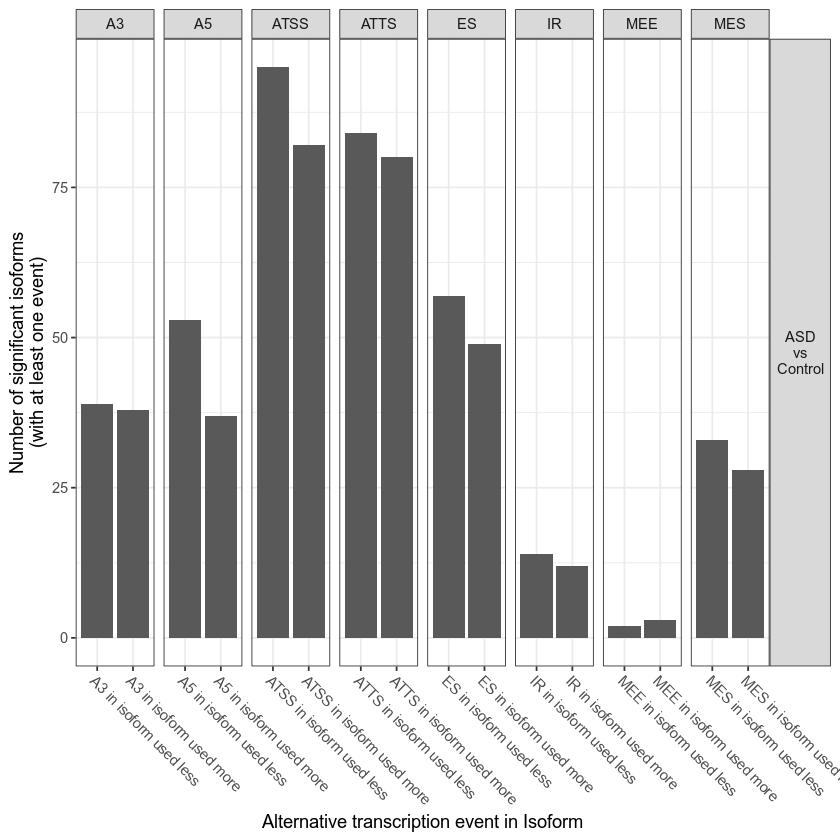

In [ ]:
extractSplicingSummary(switchListCQ)


In [ ]:
attach(switchListCQ$switchConsequence)

In [ ]:
length(unique(switchListCQ$switchConsequence$isoformDownregulated))


[1] 109

In [ ]:
length(unique(c(switchListCQ$switchConsequence$isoformDownregulated,switchListCQ$switchConsequence$isoformUpregulated)))

[1] 210